In [3]:
import numpy as np
from math import exp, sin
import pandas as pd
from SA import simulated_annealing, construct_graph, Graph_Coloring_Func

# Experiment

## Problem 1: Graph 2 Coloring

**Code part is under the Experiment part, has been imported from SA.py**
  
**Implementation detail:**  
Since the graph coloring problem and the function optimization problem use the same **simulated_annealing** function and the graph coloring problem need to the **extra input of graph** for sure, I set the graph input G as None by default. When the G is provided, the program will do graph 2 coloring, otherwise it will execute function optimization.  

**Therefore, please make sure to provide the graph as follows when you want to test the graph 2 coloring problem:**  
simulated_annealing(Graph_Coloring_Func, x_initial, allowed, t0, t_final, **G**)

In [4]:
N = 5
G = construct_graph(N)
x_initial = np.zeros(N)
t0 = 10
t_final = 0.1
allowed = [0,1]

bx, bs = simulated_annealing(Graph_Coloring_Func, x_initial, allowed, t0, t_final, G)
print("Coloring Solution:{} \nError: {}".format(bx,bs))

Coloring Solution:[1. 0. 1. 0. 1.] 
Error: 0.0


### Scale up problem sizes

In [61]:
Ns = [5, 10, 15, 20, 25, 30, 35, 40, 50]
test_num = 20
record = {}

for N in Ns:
    print("Testing %d ..." %N)
    record[N] = []
    for i in range(test_num):
        G = construct_graph(N)
        x_initial = np.zeros(N)
        t0 = 10
        t_final = 0.1
        allowed = [0,1]

        bx, bs = simulated_annealing(Graph_Coloring_Func, x_initial, allowed, t0, t_final, G)
        record[N].append(bs)

result = pd.DataFrame(columns= ['Graph_size', 'Error_mean', 'Error_std'])
for _, N in enumerate(record):
    scores = record[N]
    res = pd.DataFrame(np.array([N, np.mean(scores), np.std(scores)])).T
    res.columns = ['Graph_size', 'Error_mean', 'Error_std']
    result = result.append(res)
result

Testing 5 ...
Testing 10 ...
Testing 15 ...
Testing 20 ...
Testing 25 ...
Testing 30 ...
Testing 35 ...
Testing 40 ...
Testing 50 ...


,Graph_size,Error_mean,Error_std
0,5.0,0.05,0.217945
0,10.0,0.40,0.583095
0,15.0,0.95,0.804674
0,20.0,1.75,0.993730
0,25.0,2.45,1.596089
0,30.0,2.85,1.194780
0,35.0,3.85,1.796524
0,40.0,4.80,1.805547
0,50.0,7.05,2.132487


In [289]:
result.to_csv("graph_scale.csv", index=None)

### Generalize to multi-way choice for value

In [73]:
N = 50
G = construct_graph(N)
x_initial = np.zeros(N)
t0 = 10
t_final = 0.1
allowed = [0,1,2]
bx, bs = simulated_annealing(Graph_Coloring_Func, x_initial, allowed, t0, t_final, G)
print("Coloring Solution:{} \nError: {}".format(bx,bs))

Coloring Solution:[1. 0. 2. 0. 2. 0. 1. 0. 2. 1. 2. 0. 1. 0. 1. 2. 0. 1. 2. 1. 2. 0. 2. 0.
 2. 1. 0. 1. 0. 1. 0. 2. 1. 2. 1. 2. 0. 1. 0. 2. 0. 2. 0. 1. 0. 2. 0. 1.
 0. 1.] 
Error: 0.0


As we can see from aboving experiment, when we generalize to multi-choice, the coloring ability has been greatly improved:  
  
2-coloring SA could barely handle the graph with the size of 50, but 3-coloring SA can take it easily.

## Problem 2: Function Optimization

Choose following as test function:$$f(x)=x sin(\frac{1}{2}x)$$ 
Limit the range in \[-50, 50\] where contains 9 local optima and 2 of them are the best result.

In [74]:
from math import sin

# vector version of function
def func_test(x):
    return x[0]*sin((1/2)*x[0])

# scalar version of function
def func_test1(x):
    return x*sin((1/2)*x)


### Visualize

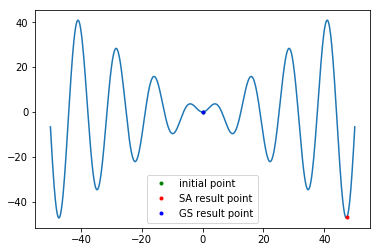

In [88]:
import matplotlib.pyplot as plt
r = 50
func = func_test
x_initial = [0.0]
t0 = 10
t_final = 0.1
allowed = [-r,r]
bx, bs = simulated_annealing(func_test, x_initial, allowed, t0, t_final)
GSx, GSf = GS(func_test1,x_initial[0])

xs = np.linspace(-r,r,1000)
ys = [func([x]) for x in xs]
plt.plot(xs,ys)
plt.plot(x_initial, func(x_initial), 'g.', label='initial point')
plt.plot(bx, bs,'r.', label='SA result point')
plt.plot(GSx, GSf, 'b.', label='GS result point')
plt.legend()
plt.show()

From aboving plot, it's obvious that SA can reach a more global optimum than coordinate descent. 

### Evaluate

There are 5 sets of optima here, and we could assign different error weights depending on how optimal the point is.
1. Counting: Number points that belong to different optimal levels, if x is in \[optimum_x +- gap\]
  
2. Average Weighted Error: Assign different weights to different optimal range, sum up and average to get error measure.

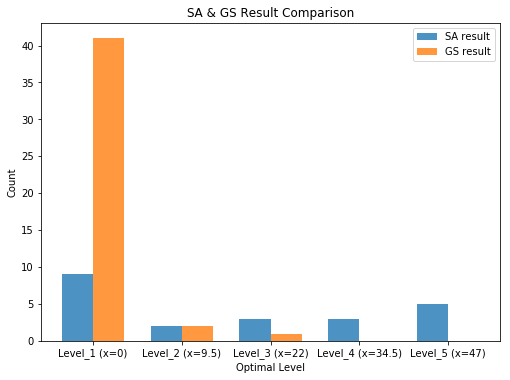

SA average error to the nearest optimum point: 3.1393
GS average error to the nearest optimum point: 0.0459


In [287]:
test_num = 50

r = 50
func = func_test
x_initial = [0.0]
t0 = 10
t_final = 0.1
allowed = [-r,r]
SA_res = {}
SA_err = 0.0
GS_res = {}
GS_err = 0.0
ran = [0, 9.5, 22, 34.5, 47]
ran_value = [func([0]), func([9.5]), func([22]), func([34.5]), func([47])]
ran_weight = [5,4,3,2,1]
gap = 2
for c in range(5):
    SA_res[c] = 0
    GS_res[c] = 0

for i in range(test_num):
    
    SAx, SAf = simulated_annealing(func_test, x_initial, allowed, t0, t_final)
    GSx, GSf = GS(func_test1,x_initial[0])
    
    # SA count
    if(ran[0]-gap < SAx[0] < ran[0]+gap):
        SA_res[0] += 1
        SA_err += ran_weight[0] * abs(SAf-ran_value[0])
    elif(ran[1]-gap < SAx[0] < ran[1]+gap):
        SA_res[1] += 1
        SA_err += ran_weight[1] * abs(SAf-ran_value[1])
    elif(ran[2]-gap < SAx[0] < ran[2]+gap):
        SA_res[2] += 1
        SA_err += ran_weight[2] * abs(SAf-ran_value[2])
    elif(ran[3]-gap < SAx[0] < ran[3]+gap):
        SA_res[3] += 1
        SA_err += ran_weight[3] * abs(SAf-ran_value[3])
    elif(ran[4]-gap < SAx[0] < ran[4]+gap):
        SA_res[4] += 1
        SA_err += ran_weight[4] * abs(SAf-ran_value[4])
        
    # GS count
    if(ran[0]-gap < GSx < ran[0]+gap):
        GS_res[0] += 1
        GS_err += ran_weight[0] * abs(GSf-ran_value[0])
    elif(ran[1]-gap < GSx < ran[1]+gap):
        GS_res[1] += 1
        GS_err += ran_weight[1] * abs(GSf-ran_value[1])
    elif(ran[2]-gap < GSx < ran[2]+gap):
        GS_res[2] += 1
        GS_err += ran_weight[2] * abs(GSf-ran_value[2])
    elif(ran[3]-gap < GSx < ran[3]+gap):
        GS_res[3] += 1
        GS_err += ran_weight[3] * abs(GSf-ran_value[3])
    elif(ran[4]-gap < GSx < ran[4]+gap):
        GS_res[4] += 1
        GS_err += ran_weight[4] * abs(GSf-ran_value[4])



index = np.arange(5)
width = 0.35
opacity = 0.8

plt.figure(figsize=(7,5))
plt.bar(index,SA_res.values(), width, alpha=opacity, label='SA result')
plt.bar(index+width,GS_res.values(), width, alpha=opacity, label='GS result')
plt.tight_layout()
plt.xticks(index + width/2, ('Level_1 (x=0)', 'Level_2 (x=9.5)', 'Level_3 (x=22)', 'Level_4 (x=34.5)','Level_5 (x=47)'))
plt.title("SA & GS Result Comparison")
plt.ylabel("Count")
plt.xlabel("Optimal Level")
plt.legend()
plt.show()

print("SA average error to the nearest optimum point: %.4f" %(SA_err/sum(SA_res.values())))
print("GS average error to the nearest optimum point: %.4f" %(GS_err/sum(GS_res.values())))

For GS, results are more concentrated around the worst optimal point x=0, but errors to this point is relatively small.  
SA can get to higher level optima easily, but the precision is relatively low.

# Code

### Simulated Annealing Main Function

In [15]:
"""
Main Function Implementing Simulated Annealing
"""
def simulated_annealing(func, x0, allowed, t0, t_final, G=None, N_T=5, N_c=2, T_step=0.05, step = 0.9, verbose=False):
    if G is not None:
        # Execute graph coloring problem
        if verbose:
            print("Solving Graph 2-Coloring Problem")

        def wrapper_func(x, G=G):
            return func(x, G)

        def update_state(x, allowed, s):
            return graph_step(x, allowed)
    else:
        # Execute function optimization problem
        if verbose:
            print("Solving Function Optimization Problem")

        def wrapper_func(x):
            return func(x)

        def update_state(x, allowed, s):
            return func_step(x, allowed, s)

    curr_temp = t0
    ending_temp = t_final
    curr_state = x0
    curr_score = wrapper_func(curr_state)
    best = x0
    best_score = curr_score
    dim = len(curr_state)
    ac_ratio = np.ones(dim)

    while curr_temp > ending_temp:

        # Sweep
        N_loop1 = N_T
        while N_loop1 > 0:

            # Cycle
            N_loop2 = N_c
            while N_loop2 > 0:
                next_state, i = update_state(curr_state.copy(), allowed, step)

                # Boltzman
                delta_func = wrapper_func(next_state) - wrapper_func(curr_state)
                if delta_func < 0:
                    # if next is smaller, accept the change
                    curr_state = next_state
                else:
                    # if next is larger, accept with some probability
                    prob = exp(-delta_func / curr_temp)
                    threshold_prob = np.random.uniform()
                    if prob > threshold_prob:
                        # accept the change
                        curr_state = next_state
                    else:
                        # refuse
                        curr_state = curr_state
                        ac_ratio[i] = (ac_ratio[i] - 1 / N_c) if (ac_ratio[i] - 1 / N_c) > 0 else 1 / (1 + N_c)

                N_loop2 -= 1

            # update stepsize
            step = stepsize_factor(ac_ratio[i]) * step
            #             print(stepsize_factor(ac_ratio[i]))
            N_loop1 -= 1

        curr_temp = curr_temp - T_step

    best = curr_state
    best_score = wrapper_func(curr_state)

#     print(best, best_score)
    return best, best_score

### Coordinate Descent
There's only one dimension in this test function, so here's only the 1D golden section function

In [89]:
# line search

def GS(f, xs=0, s=1, mu=0, sigma=2):
# optimization method used = Integrated Bracketing and Golden Section Algorithm
    
    
    # 1 Initialize randomly
    x1 = xs + np.random.normal(mu, sigma, 1)[0]
    tau = 0.618

    ep_R = 1e-7
    ep_abs = 1e-6

    # 2 Evaluate f2
    x2 = x1 + s

    # 3 Check and invert axis
    if f(x2) < f(x1):
        f2 = f(x1 + s)
    else:
        temp = x1
        x1 = x2
        x2 = temp
        s = -s
        f2 = f(x1 + s)

    # 4 Evaluate f4 based on tau

    x2s = []
    f2s = []
    x4s = []
    f4s = []

    s = s / tau
    x4 = x2 + s
    f4 = f(x4)

    x4s.append(x4)
    f4s.append(f(x4))

    # 5 6 Check and make sure f4 > f2
    while f4 <= f2:
        x1 = x2
        x2 = x4
        s = s / tau
        x4 = x2 + s
        f4 = f(x4)
        x4s.append(x4)
        f4s.append(f(x4))
    i = 0

    x3s = []
    f3s = []

    # do
    x3 = tau * x4 + (1 - tau) * x1
    f3 = f(x3)
    x3s.append(x3)
    f3s.append(f3)

    f_new = (f(x1) + f(x2) + f(x3))/3
    f_old = f_new+1

    while (abs(x1 - x3) > ep_R * abs(x2) + ep_abs) and (abs(f_new - f_old) > ep_R*f(x2) + ep_abs):

        # 8 Loop on
        if (f2 < f3):
            x4 = x1
            x1 = x3
        else:
            x1 = x2
            x2 = x3
            f2 = f3

        # 7 Evaluate f3
        x3 = tau * x4 + (1 - tau) * x1
        f3 = f(x3)
        x3s.append(x3)
        f3s.append(f3)
        f_old = f_new
        f_new = (f(x1) + f(x2) + f(x3)) / 3
        i += 1
        
    return x2, f(x2)

#### Construct a uni-connected graph with scalable size

In [3]:
def construct_graph(N):
    g = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if abs(i-j) == 1:
                if j > i and j%N != 0:
                    g[i][j] = 1
                elif i > j and i%N !=0:
                    g[i][j] = 1
            if abs(i-j) == N:
                g[i][j] = 1
    return g

#### Flip elements in graph

In [4]:
def graph_step(x, states):
    # flip r-th element
    r = np.random.randint(len(x))
    # substitute randomly with another different value
    c = np.random.randint(len(states))
    while(states[c]==x[r]):
        c = np.random.randint(len(states))
    
    x[r] = states[c]
    return x,r

#### Update real number value

In [5]:
def func_step(x, allowed, step, global_min=-100, global_max=100):
    dim = len(x)
    r = np.random.rand()*2 -1
    i = np.random.randint(dim)
    x[i] += 1.0*r*step
    
    # If we have specified bound as left bound=allowed[0], right bound=allowed[1]
    if len(allowed) != 0:        
        if x[i]<allowed[0] or x[i]>allowed[1]:
            return [(allowed[1] - allowed[0])*np.random.random() + allowed[0]], i
    # If exceeding global bound, get a random number
    if x[i]<global_min or x[i]>global_max:
        return [200*np.random.random()-100], i
    
    return x,i

#### Helper function g(accept_ratio) to adjust step size

In [6]:
def stepsize_factor(a, constant=2):
    c = constant
    if(a<0.4):
        return 1/(1+((c*(0.4-a))/0.4))
    elif(a>0.6):
        return 1 + (c*(a-0.6))/0.4
    else:
        return a

#### Graph coloring problem evaluation function

In [7]:
def Graph_Coloring_Func(x, G):
    dim = len(x)
#     if(len(states) == 2):
#         return (np.trace(np.dot(G,np.outer(x,x.T))) + np.trace(np.dot(G,np.outer(1-x,(1-x).T))))/2
#     else:
    Esum = 0
    for i in range(dim):
        for j in range(dim):
            if x[i]==x[j] and i!=j and G[i][j] !=0:
                Esum += 1
    return Esum*1.0/2